In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('combined_data.csv')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ad_id                 10800 non-null  int64  
 1   list_id               10800 non-null  int64  
 2   list_time             10798 non-null  float64
 3   date                  10800 non-null  object 
 4   account_id            10800 non-null  int64  
 5   projectid             10800 non-null  int64  
 6   project_oid           10800 non-null  int64  
 7   account_oid           10800 non-null  object 
 8   account_name          10800 non-null  object 
 9   state                 10800 non-null  object 
 10  subject               10800 non-null  object 
 11  body                  10800 non-null  object 
 12  category              10800 non-null  int64  
 13  category_name         10800 non-null  object 
 14  area                  10800 non-null  int64  
 15  area_name          

### 3.Phân phối theo giá histogram

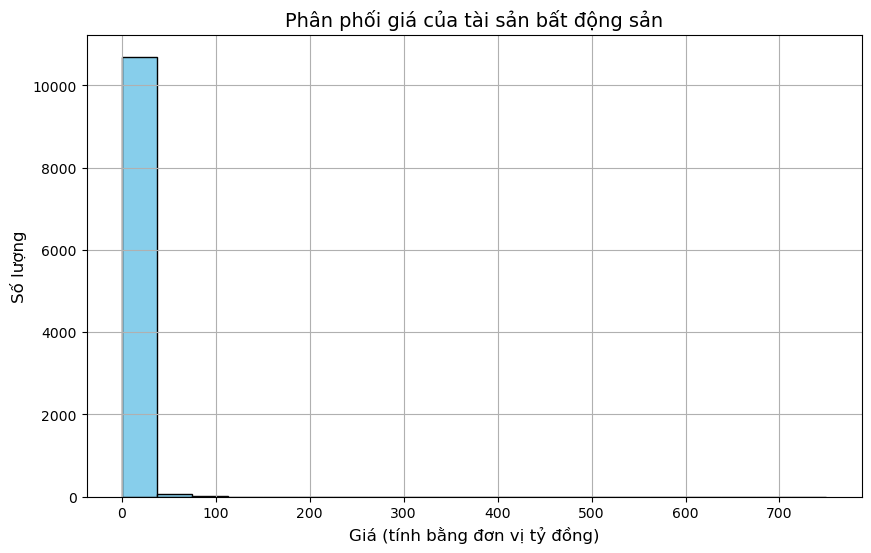

In [64]:
import matplotlib.pyplot as plt

# Vẽ histogram phân phối giá
plt.figure(figsize=(10, 6))
plt.hist(df['price'] / 1e9, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Giá (tính bằng đơn vị tỷ đồng)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân phối giá của tài sản bất động sản', fontsize=14)
plt.grid(True)

plt.show()


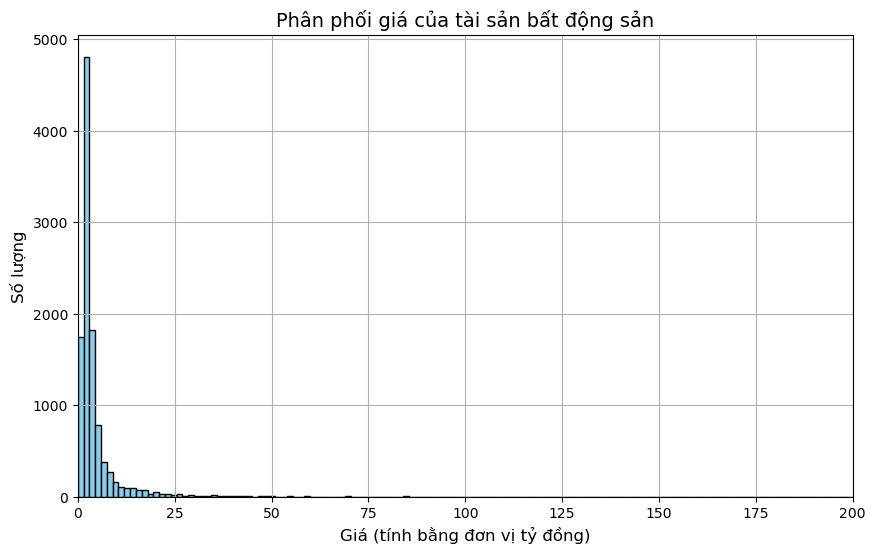

In [63]:
import matplotlib.pyplot as plt

# Vẽ histogram phân phối giá
plt.figure(figsize=(10, 6))
plt.hist(df['price'] / 1e9, bins=500, color='skyblue', edgecolor='black')
plt.xlabel('Giá (tính bằng đơn vị tỷ đồng)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân phối giá của tài sản bất động sản', fontsize=14)
plt.grid(True)

# Set x-axis limits
plt.xlim(0, 200)

plt.show()


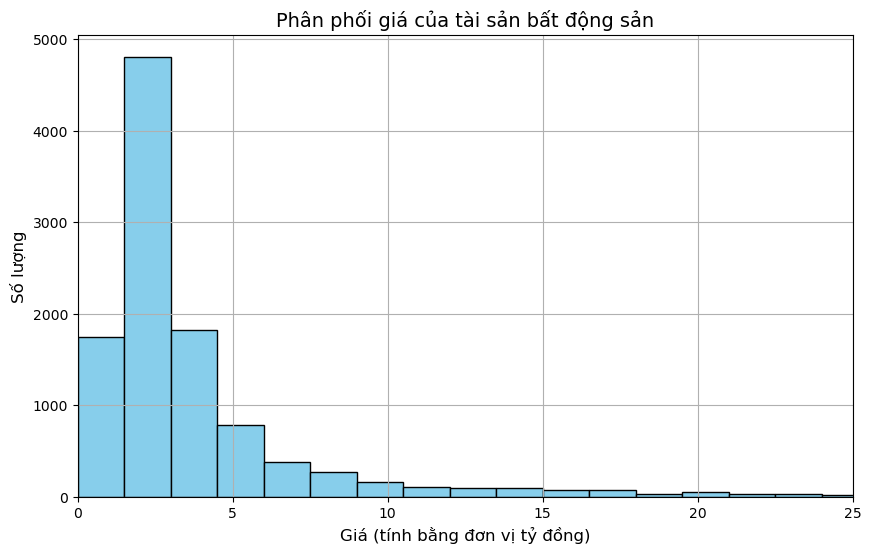

In [65]:
import matplotlib.pyplot as plt

# Vẽ histogram phân phối giá
plt.figure(figsize=(10, 6))
plt.hist(df['price'] / 1e9, bins=500, color='skyblue', edgecolor='black')
plt.xlabel('Giá (tính bằng đơn vị tỷ đồng)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân phối giá của tài sản bất động sản trong khoảng từ 0 đến 25 tỷ', fontsize=14)
plt.grid(True)

# Set x-axis limits
plt.xlim(0, 25)

plt.show()


## Câu 1 : Phạm vi giá

In [69]:
# Tìm giá tối thiểu và tối đa
min_price_vnd = df['price'].min() / 1e6  # Chuyển từ tỷ đồng sang tỷ VND
max_price_vnd = df['price'].max() / 1e9  # Chuyển từ tỷ đồng sang tỷ VND

print("Phạm vi giá của các tài sản bất động sản là từ", min_price_vnd, "triệu đến", max_price_vnd, "tỷ VND")

Phạm vi giá của các tài sản bất động sản là từ 1.9 triệu đến 750.0 tỷ VND
Thông tin bản ghi có giá tiền thấp nhất:
ad_id                                                           154701935
list_id                                                         113954266
list_time                                                 1708387185000.0
date                                                        2 tháng trước
account_id                                                           8788
projectid                                                              80
project_oid                                                    1769530405
account_oid                              bc0a4d7910da096bc887f9b5b2c5e56f
account_name                                                         Hùng
state                                                            accepted
subject                                                     đất chính chủ
body                    Cần tiền con đi học cắt bán 1000m2 điện nước đ.

In [70]:
# Tìm chỉ mục của bản ghi có giá tiền thấp nhất và cao nhất
min_price_index = df['price'].idxmin()
max_price_index = df['price'].idxmax()

# Hiển thị thông tin của bản ghi có giá tiền thấp nhất
print("Thông tin bản ghi có giá tiền thấp nhất:")
print(df.loc[min_price_index])

# Hiển thị thông tin của bản ghi có giá tiền cao nhất
print("\nThông tin bản ghi có giá tiền cao nhất:")
print(df.loc[max_price_index])


Thông tin bản ghi có giá tiền thấp nhất:
ad_id                                                           154701935
list_id                                                         113954266
list_time                                                 1708387185000.0
date                                                        2 tháng trước
account_id                                                           8788
projectid                                                              80
project_oid                                                    1769530405
account_oid                              bc0a4d7910da096bc887f9b5b2c5e56f
account_name                                                         Hùng
state                                                            accepted
subject                                                     đất chính chủ
body                    Cần tiền con đi học cắt bán 1000m2 điện nước đ...
category                                                             10

In [5]:
df['price']

0        2.000000e+09
1        2.100000e+09
2        3.333333e+10
3        1.300000e+09
4        3.500000e+08
             ...     
10795    1.300000e+09
10796    1.650000e+09
10797    1.750000e+09
10798    6.500000e+09
10799    8.600000e+08
Name: price, Length: 10800, dtype: float64

## Câu 1 : Biểu Đồ Phạm vi giá cho (5000 điểm dữ liệu) sử dụng boxplot

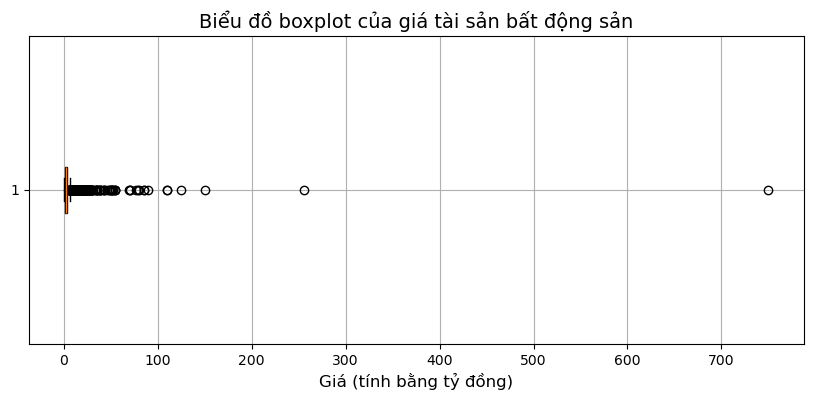

In [28]:
# Vẽ biểu đồ boxplot
plt.figure(figsize=(10, 4))
plt.boxplot(df.head(5000)['price'] / 1e9, vert=False, patch_artist=True)  # Convert prices to billion dong
plt.xlabel('Giá (tính bằng tỷ đồng)', fontsize=12)  # Change label to billion dong
plt.title('Biểu đồ boxplot của giá tài sản bất động sản', fontsize=14)
plt.grid(True)
plt.show()

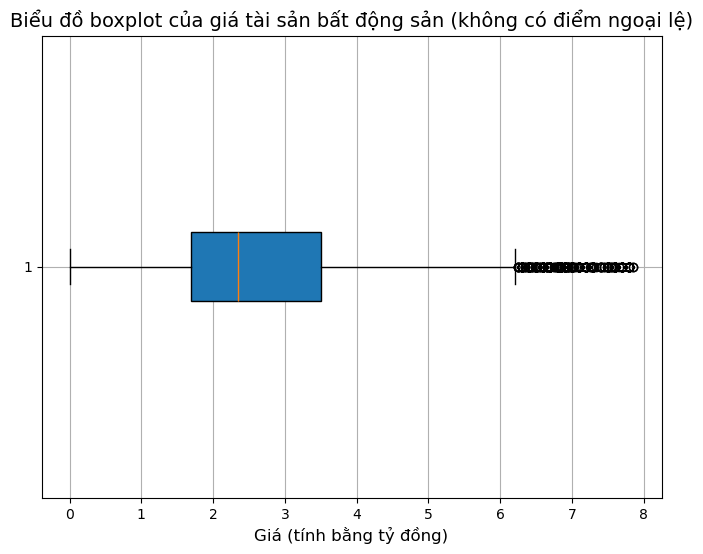

In [44]:
import matplotlib.pyplot as plt

# Calculate quartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
non_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Plot boxplot based on non-outliers
plt.figure(figsize=(8, 6))
plt.boxplot(non_outliers['price'] / 1e9, vert=False, patch_artist=True)  # Convert prices to billion dong
plt.xlabel('Giá (tính bằng tỷ đồng)', fontsize=12)  # Change label to billion dong
plt.title('Biểu đồ boxplot của giá tài sản bất động sản (không có điểm ngoại lệ)', fontsize=14)
plt.grid(True)
plt.show()


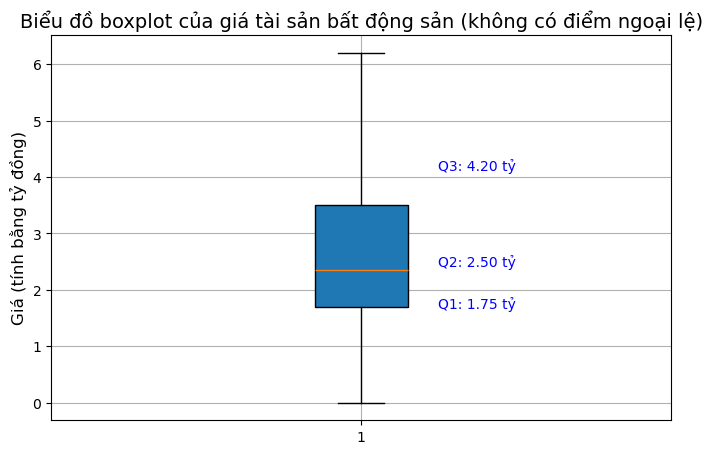

In [91]:


# Calculate quartiles
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].quantile(0.50)  # Median
Q3 = df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
non_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Plot boxplot based on non-outliers
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
plt.boxplot(non_outliers['price'] / 1e9, vert=True, patch_artist=True, showfliers=False)  # Convert prices to billion dong and exclude outliers
plt.ylabel('Giá (tính bằng tỷ đồng)', fontsize=12)  # Change label to billion dong
plt.title('Biểu đồ boxplot của giá tài sản bất động sản (không có điểm ngoại lệ)', fontsize=14)
plt.grid(True)

# Hiển thị các giá trị trên plot
plt.text(1.25, Q1 / 1e9, f'Q1: {Q1 / 1e9:.2f} tỷ', verticalalignment='center', fontsize=10, color='blue', ha='right')
plt.text(1.25, Q2 / 1e9, f'Q2: {Q2 / 1e9:.2f} tỷ', verticalalignment='center', fontsize=10, color='blue', ha='right')
plt.text(1.25, Q3 / 1e9, f'Q3: {Q3 / 1e9:.2f} tỷ', verticalalignment='center', fontsize=10, color='blue', ha='right')
plt.show()



## 4.Phân phối theo diện tích như thế nào? 

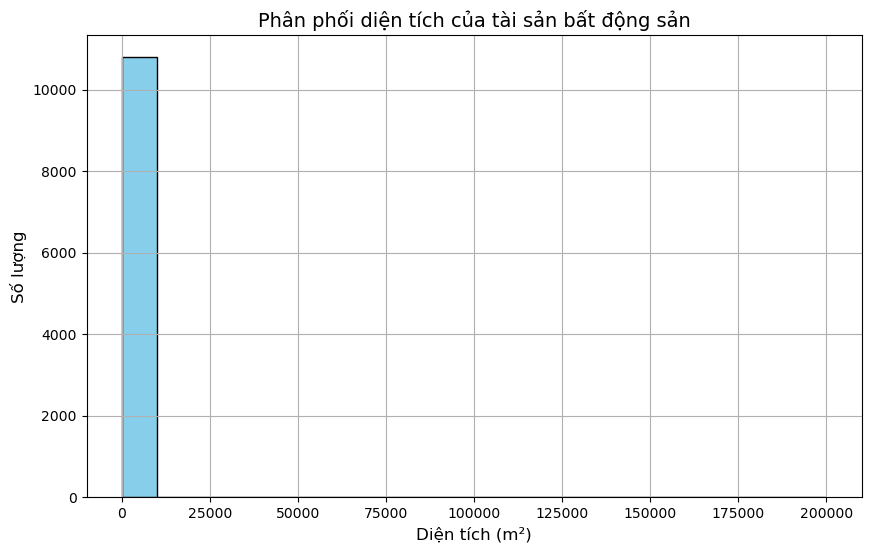

In [109]:
# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(df['size'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Diện tích (m²)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân phối diện tích của tài sản bất động sản', fontsize=14)
plt.grid(True)
plt.show()

Biểu đồ tập trung nhiều nhất ở khoảng 500m^2

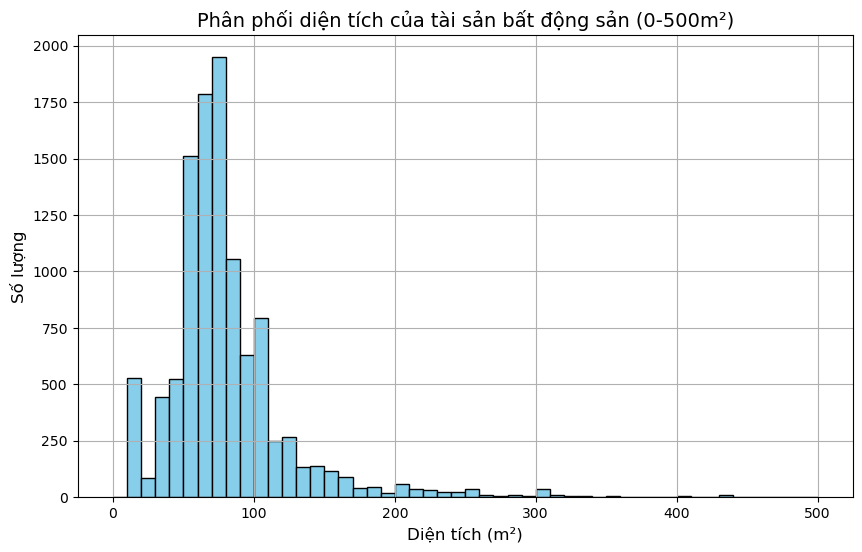

In [110]:
# Vẽ biểu đồ histogram với giới hạn từ 0 đến 500m²
plt.figure(figsize=(10, 6))
plt.hist(df['size'], bins=50, range=(0, 500), color='skyblue', edgecolor='black')
plt.xlabel('Diện tích (m²)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân phối diện tích của tài sản bất động sản (0-500m²)', fontsize=14)
plt.grid(True)
plt.show()


## Câu 2 Tính số lượng tài sản bất động sản trong tập dữ liệu.")


In [111]:
# Tính số lượng tài sản bất động sản trong tập dữ liệu
total_properties = df.shape[0]

print(f"Có tổng cộng {total_properties} tài sản bất động sản trong tập dữ liệu.")

Có tổng cộng 10800 tài sản bất động sản trong tập dữ liệu.


## Câu 5 : Phân phối của số phòng

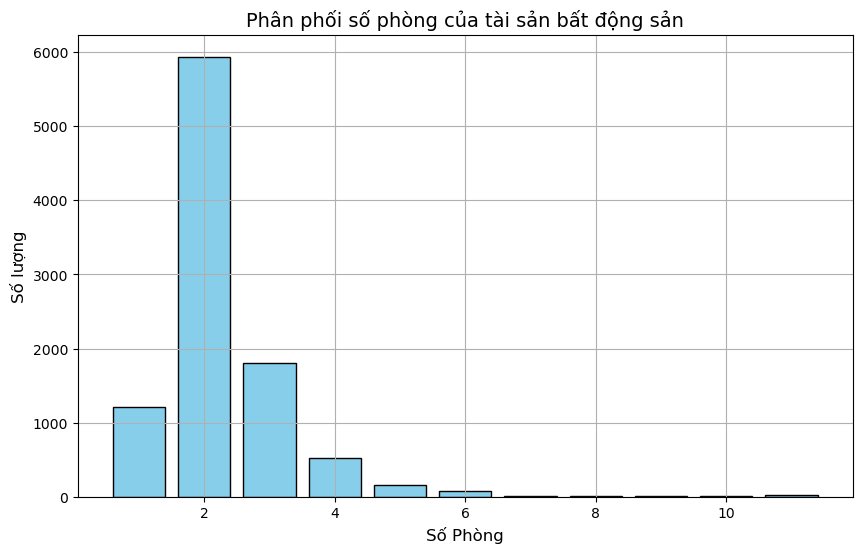

In [112]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(df['rooms'].value_counts().index, df['rooms'].value_counts().values, color='skyblue', edgecolor='black')
plt.xlabel('Số Phòng', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.title('Phân phối số phòng của tài sản bất động sản', fontsize=14)
plt.grid(True)
plt.show()


## Câu 6.Có bao nhiêu tài sản bất động sản theo từng loại danh mục? Phân phối của giá cả theo loại danh mục như thế nào?

In [114]:
# Tính số lượng tài sản bất động sản theo từng loại danh mục
property_count_by_category = df['category_name'].value_counts()

print("Số lượng tài sản bất động sản theo từng loại danh mục:")
print(property_count_by_category)


Số lượng tài sản bất động sản theo từng loại danh mục:
category_name
Căn hộ/Chung cư                   8766
Nhà ở                             1002
Đất                                926
Văn phòng, Mặt bằng kinh doanh     106
Name: count, dtype: int64


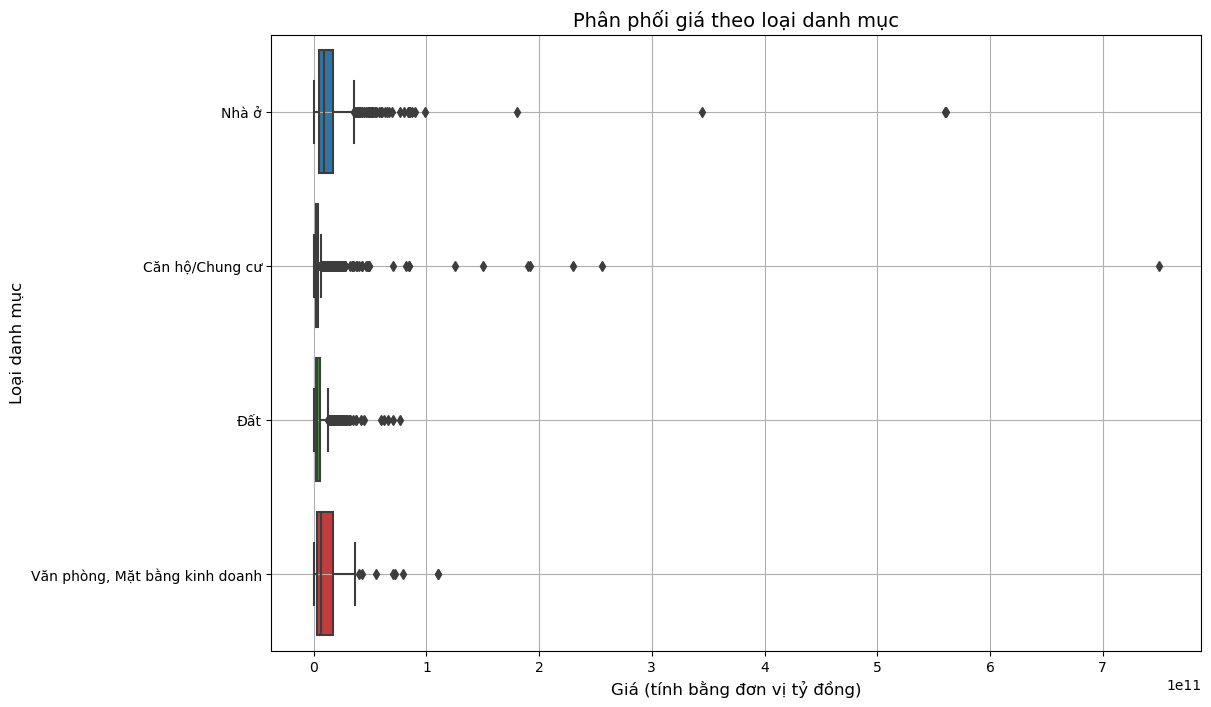

In [115]:
# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='price', y='category_name', data=df)
plt.xlabel('Giá (tính bằng đơn vị tỷ đồng)', fontsize=12)
plt.ylabel('Loại danh mục', fontsize=12)
plt.title('Phân phối giá theo loại danh mục', fontsize=14)
plt.grid(True)
plt.show()


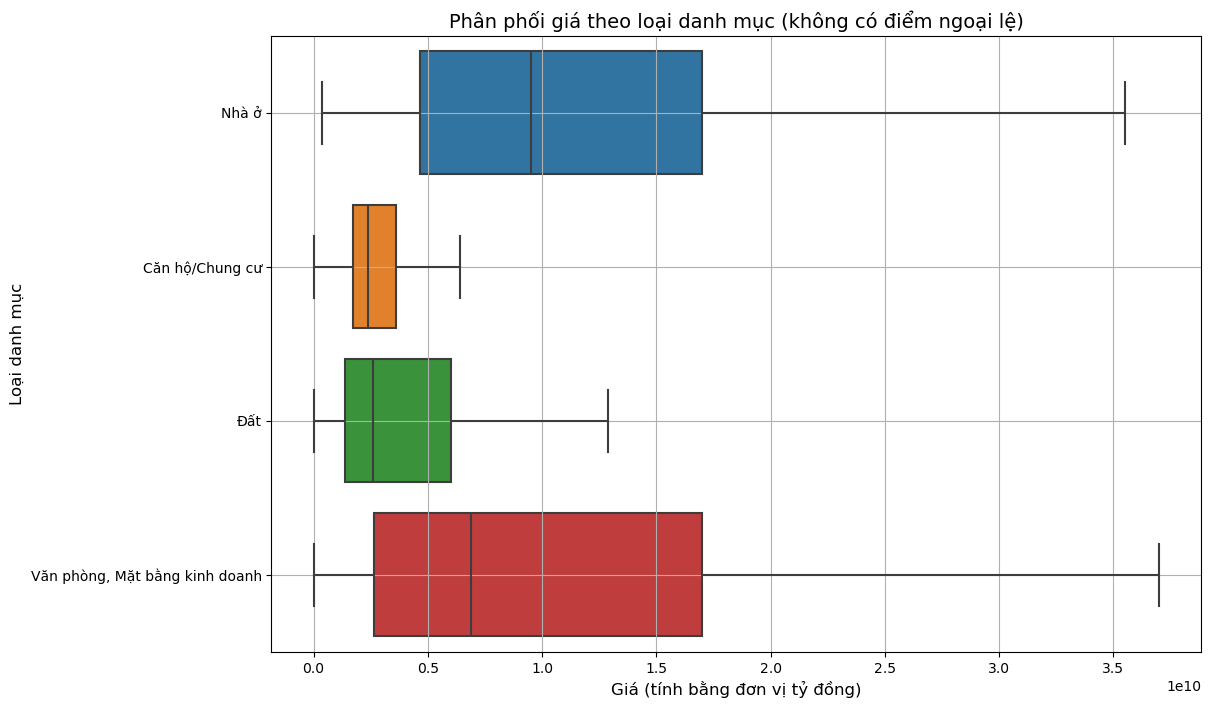

In [116]:
# Vẽ biểu đồ boxplot và loại bỏ điểm ngoại lệ
plt.figure(figsize=(12, 8))
sns.boxplot(x='price', y='category_name', data=df, showfliers=False)
plt.xlabel('Giá (tính bằng đơn vị tỷ đồng)', fontsize=12)
plt.ylabel('Loại danh mục', fontsize=12)
plt.title('Phân phối giá theo loại danh mục (không có điểm ngoại lệ)', fontsize=14)
plt.grid(True)
plt.show()


## Câu 7.Có bao nhiêu tài sản bất động sản được niêm yết trong từng tỉnh/thành phố?

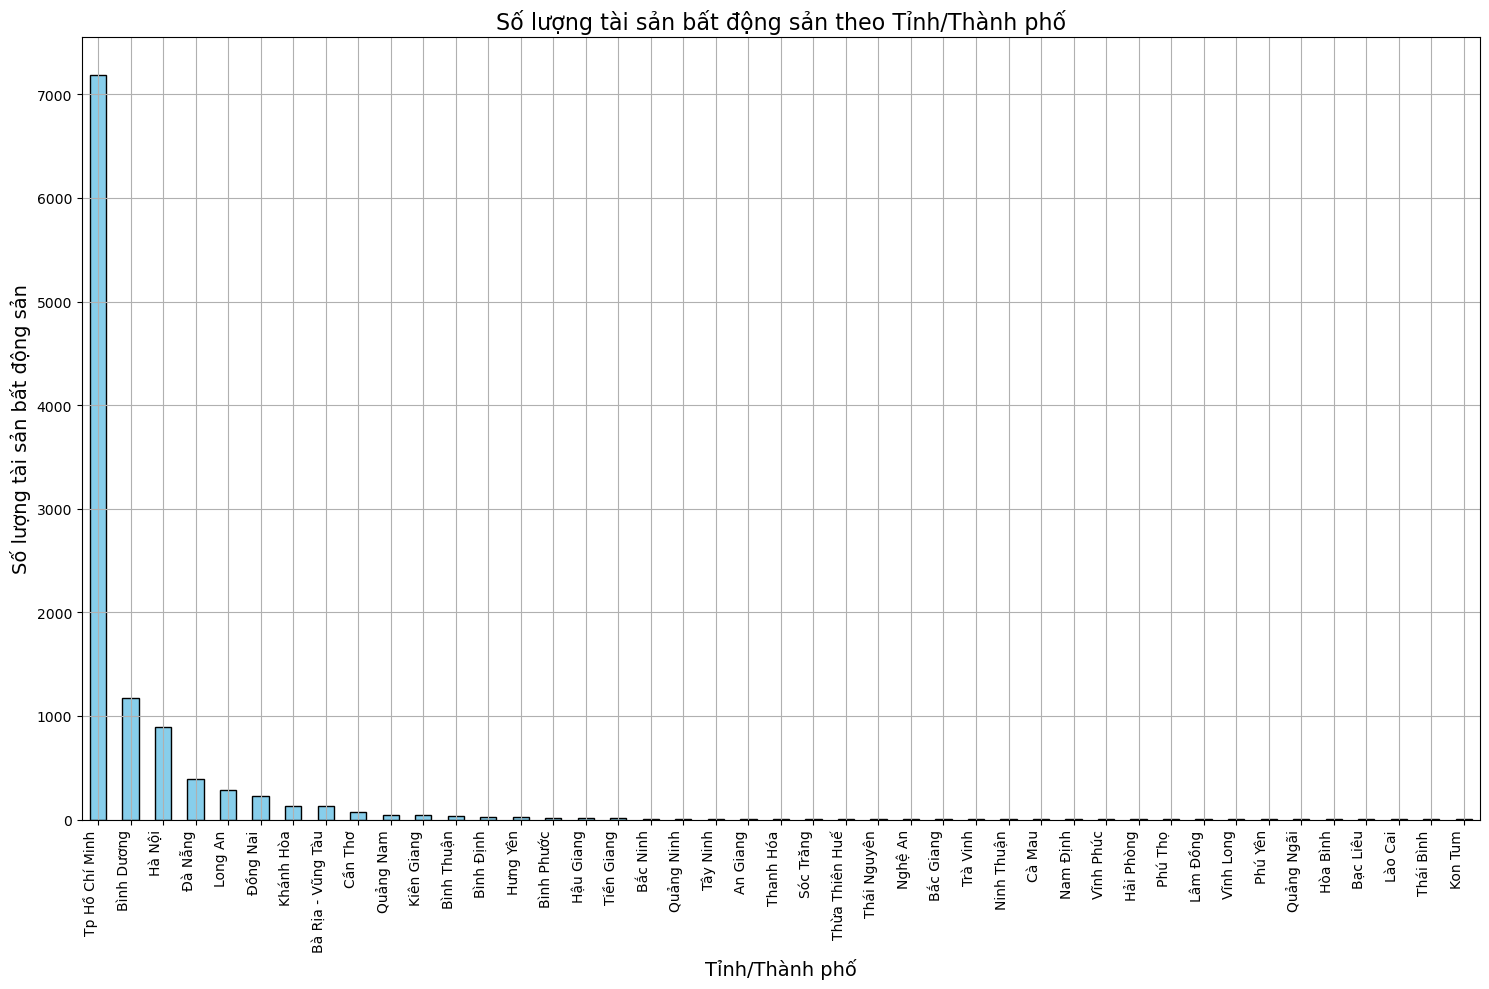

In [124]:
# Nhóm dữ liệu theo cột 'region_name' và đếm số lượng trong mỗi nhóm
property_count_by_region = df['region_name'].value_counts()

# Sắp xếp dữ liệu theo số lượng tài sản (giảm dần)
property_count_by_region = property_count_by_region.sort_values(ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))  # Thay đổi kích thước figure (tùy chỉnh)
property_count_by_region.plot(kind='bar', color='skyblue', edgecolor='black')

# Chỉnh sửa nhãn trục
plt.xlabel('Tỉnh/Thành phố', fontsize=14)
plt.ylabel('Số lượng tài sản bất động sản', fontsize=14)

# Chỉnh sửa tiêu đề
plt.title('Số lượng tài sản bất động sản theo Tỉnh/Thành phố', fontsize=16)

# Hiển thị lưới
plt.grid(True)

# Xoay nhãn trục x để dễ đọc (tùy chọn)
plt.xticks(rotation=90, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh bố cục để hiển thị đầy đủ nhãn và chú thích
plt.show()

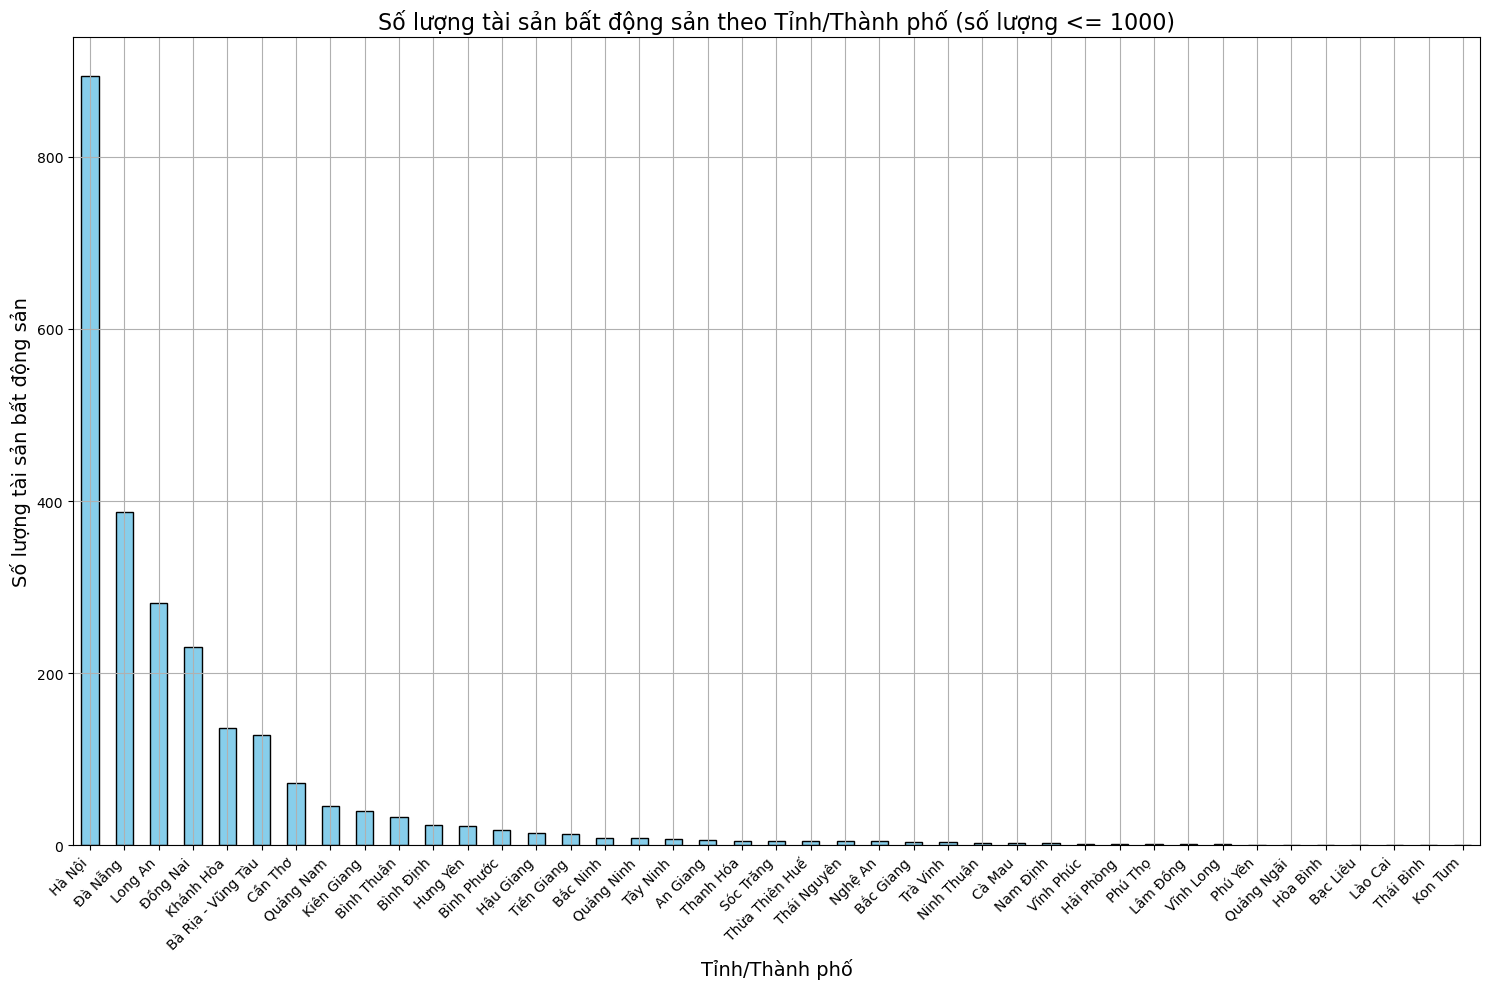

In [127]:
# Lọc các tỉnh/thành phố có số lượng tài sản bất động sản nhỏ hơn hoặc bằng 1000
filtered_property_count_by_region = property_count_by_region[property_count_by_region <= 1000]

# Vẽ biểu đồ cột cho dữ liệu lọc
plt.figure(figsize=(15, 10))
filtered_property_count_by_region.plot(kind='bar', color='skyblue', edgecolor='black')

# Chỉnh sửa nhãn trục
plt.xlabel('Tỉnh/Thành phố', fontsize=14)
plt.ylabel('Số lượng tài sản bất động sản', fontsize=14)

# Chỉnh sửa tiêu đề
plt.title('Số lượng tài sản bất động sản theo Tỉnh/Thành phố (số lượng <= 1000)', fontsize=16)

# Hiển thị lưới
plt.grid(True)

# Xoay nhãn trục x để dễ đọc (tùy chọn)
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


## Mối tương quan của một số trường dữ liệu

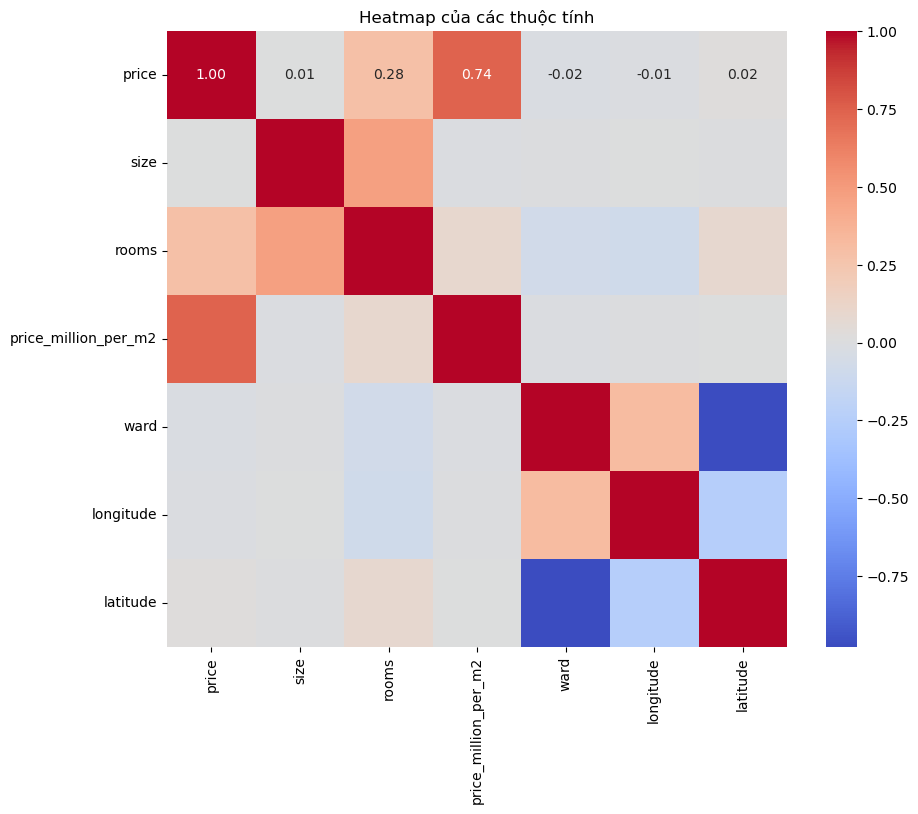

In [134]:
# Lựa chọn các cột quan tâm
selected_columns = ['price', 'size', 'rooms', 'price_million_per_m2', 'ward', 'longitude', 'latitude']

# Tính toán ma trận tương quan
correlation_matrix = df[selected_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap của các thuộc tính')
plt.show()